# Part 1: Data Pre-Processing and Visualization

In [1]:
import pandas as pd

# Importing the data
data = pd.read_csv('project2.data')

In [2]:
# Identifying shape and size of the raw data
print('The shape of data is', data.shape, 'and the size of the data is', data.size)

The shape of data is (286, 10) and the size of the data is 2860


In [3]:
# Getting information about datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
# Just viewing the data
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [5]:
# To help visualize the data
print('Class', data['class'].unique(), '\nAge', data['age'].unique(), '\nMenopause', data['menopause'].unique())
print('Tumor-Size', data['tumor-size'].unique(), '\nInv-Nodes', data['inv-nodes'].unique(), '\nNode-Caps', data['node-caps'].unique())
print('Deg-Malig', data['deg-malig'].unique(), '\nBreast', data['breast'].unique(), '\nBreast-Quad', data['breast-quad'].unique())
print('Irradiat', data['irradiat'].unique())

Class ['no-recurrence-events' 'recurrence-events'] 
Age ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29'] 
Menopause ['premeno' 'ge40' 'lt40']
Tumor-Size ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49'] 
Inv-Nodes ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26'] 
Node-Caps ['no' 'yes' '?']
Deg-Malig [3 2 1] 
Breast ['left' 'right'] 
Breast-Quad ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']
Irradiat ['no' 'yes']


In [6]:
# Just looking at the data
data[data['node-caps'] == "?"]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [7]:
# Used ChatGPT here to find the "value_counts" function
data['node-caps'].value_counts()

node-caps
no     222
yes     56
?        8
Name: count, dtype: int64

In [8]:
data[data['inv-nodes'] == "0-2"]['node-caps'].value_counts()

node-caps
no     201
yes      9
?        3
Name: count, dtype: int64

In [9]:
# For-loop to replace ? values in the node-caps column
for x in data['inv-nodes'].unique():
    data_val_counts = data[data['inv-nodes'] == x]['node-caps'].value_counts()
    # Printing before
    print('Before for ', x, ': \n', data_val_counts, '\n')

    # If the certain inv-nodes has a "?" value, continue
    if not (data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == '?')].empty):
        
        # If there are both 'yes' and 'no', continue
        if not ((data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == 'yes')].empty) & (data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == 'no')].empty)):
            
            # Median approach
            if (data_val_counts['yes'] > data_val_counts['no']):
                data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == "?"), 'node-caps'] = 'yes'
                
            elif (data_val_counts['yes'] < data_val_counts['no']):
                data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == "?"), 'node-caps'] = 'no'
                
            # Thought it would be safer to have no than yes for this dataset
            else:
                data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == "?"), 'node-caps'] = 'no'
                
        # This is technically not needed for this dataset, but would work for other datasets
        elif not (data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == 'yes')].empty):
            data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == "?"), 'node-caps'] = 'yes'
            
        elif not (data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == 'no')].empty):
            data.loc[(data['inv-nodes'] == x) & (data['node-caps'] == "?"), 'node-caps'] = 'no'
    # Printing after
    print('After for ', x, ': \n', data[data['inv-nodes'] == x]['node-caps'].value_counts(), '\n')


Before for  0-2 : 
 node-caps
no     201
yes      9
?        3
Name: count, dtype: int64 

After for  0-2 : 
 node-caps
no     204
yes      9
Name: count, dtype: int64 

Before for  6-8 : 
 node-caps
yes    14
no      3
Name: count, dtype: int64 

After for  6-8 : 
 node-caps
yes    14
no      3
Name: count, dtype: int64 

Before for  9-11 : 
 node-caps
yes    6
?      3
no     1
Name: count, dtype: int64 

After for  9-11 : 
 node-caps
yes    9
no     1
Name: count, dtype: int64 

Before for  3-5 : 
 node-caps
yes    19
no     15
?       2
Name: count, dtype: int64 

After for  3-5 : 
 node-caps
yes    21
no     15
Name: count, dtype: int64 

Before for  15-17 : 
 node-caps
yes    5
no     1
Name: count, dtype: int64 

After for  15-17 : 
 node-caps
yes    5
no     1
Name: count, dtype: int64 

Before for  12-14 : 
 node-caps
yes    2
no     1
Name: count, dtype: int64 

After for  12-14 : 
 node-caps
yes    2
no     1
Name: count, dtype: int64 

Before for  24-26 : 
 node-caps
yes   

In [10]:
# Proving that it worked
data['node-caps'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
# Looking at the data for breast-quad
data[data['breast-quad'] == "?"]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [12]:
data['breast-quad'].value_counts()

breast-quad
left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: count, dtype: int64

In [13]:
data.loc[data['breast-quad'] == "?", 'breast-quad'] = 'left_low'

In [14]:
# Checking to make sure it was properly replaced
data[data['breast-quad'] == "?"]

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat


In [15]:
data

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [16]:
# Converting object datatypes to categorical
data['class'] = data['class'].astype('category')
data['menopause'] = data['menopause'].astype('category')
data['node-caps'] = data['node-caps'].astype('category')
data['breast'] = data['breast'].astype('category')
data['breast-quad'] = data['breast-quad'].astype('category')
data['irradiat'] = data['irradiat'].astype('category')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        286 non-null    category
 1   age          286 non-null    object  
 2   menopause    286 non-null    category
 3   tumor-size   286 non-null    object  
 4   inv-nodes    286 non-null    object  
 5   node-caps    286 non-null    category
 6   deg-malig    286 non-null    int64   
 7   breast       286 non-null    category
 8   breast-quad  286 non-null    category
 9   irradiat     286 non-null    category
dtypes: category(6), int64(1), object(3)
memory usage: 11.6+ KB


In [18]:
data = pd.get_dummies(data, columns=['class', 'menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      286 non-null    object
 1   tumor-size               286 non-null    object
 2   inv-nodes                286 non-null    object
 3   deg-malig                286 non-null    int64 
 4   class_recurrence-events  286 non-null    bool  
 5   menopause_lt40           286 non-null    bool  
 6   menopause_premeno        286 non-null    bool  
 7   node-caps_yes            286 non-null    bool  
 8   breast_right             286 non-null    bool  
 9   breast-quad_left_low     286 non-null    bool  
 10  breast-quad_left_up      286 non-null    bool  
 11  breast-quad_right_low    286 non-null    bool  
 12  breast-quad_right_up     286 non-null    bool  
 13  irradiat_yes             286 non-null    bool  
dtypes: bool(10), int64(1), object(3)
memory us

In [19]:
# Converting the tumor-size, inv-nodes, and age column to integer
x = ['tumor-size', 'inv-nodes', 'age']
for i in x:
    for j in data[i].unique():
        data.loc[(data[i] == j), i] = int(j.split('-')[0])
    data[i] = data[i].astype('int')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      286 non-null    int64
 1   tumor-size               286 non-null    int64
 2   inv-nodes                286 non-null    int64
 3   deg-malig                286 non-null    int64
 4   class_recurrence-events  286 non-null    bool 
 5   menopause_lt40           286 non-null    bool 
 6   menopause_premeno        286 non-null    bool 
 7   node-caps_yes            286 non-null    bool 
 8   breast_right             286 non-null    bool 
 9   breast-quad_left_low     286 non-null    bool 
 10  breast-quad_left_up      286 non-null    bool 
 11  breast-quad_right_low    286 non-null    bool 
 12  breast-quad_right_up     286 non-null    bool 
 13  irradiat_yes             286 non-null    bool 
dtypes: bool(10), int64(4)
memory usage: 11.9 KB


In [21]:
data.describe()

,age,tumor-size,inv-nodes,deg-malig
count,286.000000,286.000000,286.000000,286.000000
mean,46.643357,24.405594,1.573427,2.048951
std,10.118183,10.529649,3.451904,0.738217
min,20.000000,0.000000,0.000000,1.000000
25%,40.000000,20.000000,0.000000,2.000000
50%,50.000000,25.000000,0.000000,2.000000
75%,50.000000,30.000000,3.000000,3.000000
max,70.000000,50.000000,24.000000,3.000000


<Axes: xlabel='age', ylabel='count'>

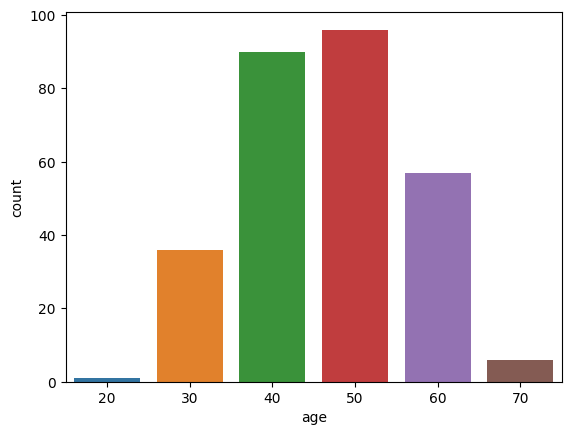

In [22]:
# Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['age'])

## Comments on observations:

The graph of the age shows that this dataset contains a lot of data for the middle age range (40-50).
This means that the model will ultimately have a larger bias for the middle age group compared to
the youngest and oldest age groups because there is simply more data.

<Axes: xlabel='tumor-size'>

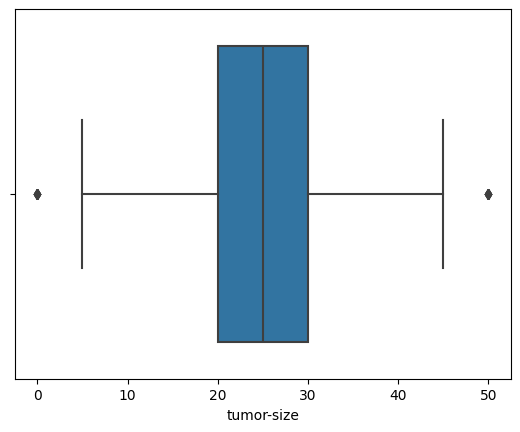

In [23]:
sns.boxplot(data=data, x='tumor-size')

## Comments on observations:

This graph for tumor size shows that the data is also very middle heavy, giving more bias towards medium sized tumors compared to the smaller and larger sized tumors. This is also seen with the dots on either side of the box plot, which show that the largest and smallest tumor sizes are outliers of the dataset.

<Axes: xlabel='deg-malig', ylabel='count'>

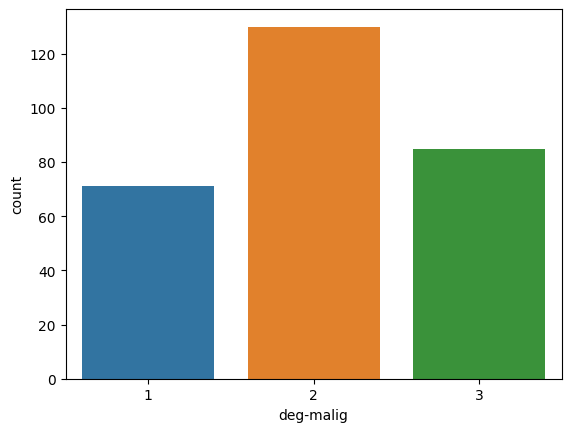

In [24]:
sns.countplot(data=data, x='deg-malig')

## Comments on observations:

The degree of malignancy seems to be pretty decently spread as it is evenly spread amongst all 3 different degrees of malignancy. There might be a slight bias towards the higher degrees, but overall not as bad as the other values.

# Part 2: Building and Assessing Models

In [25]:
from sklearn.model_selection import train_test_split

# Splitting the train and test
y = data['class_recurrence-events']
X = data.drop(['class_recurrence-events'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Model 1: K-Nearest Neighbor

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Results
accuracy_test=accuracy_score(y_test, knn.predict(X_test))
print('Accuracy of knn on test data: {:.2}'.format(accuracy_test))

accuracy_train=accuracy_score(y_train, knn.predict(X_train))
print('Accuracy of knn on train data: {:.2}'.format(accuracy_train))

Accuracy of knn on test data: 0.62
Accuracy of knn on train data: 0.81


## Improving the KNN Model

In [28]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5, scoring='recall')
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

best_knn_recall = knn_gscv.best_estimator_

In [29]:
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
knn_gscv.best_params_

best_knn = knn_gscv.best_estimator_

Accuracy on the test data for best knn: 0.7093023255813954
Accuracy of on train data for best knn: 0.69


In [30]:
from sklearn.metrics import classification_report

print(f"Performance on TEST\n*******************\n{classification_report(y_test, knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, knn.predict(X_train))}")

print(f"Performance on best knn TEST\n*******************\n{classification_report(y_test, best_knn.predict(X_test))}")
print(f"Performance on best knn TRAIN\n********************\n{classification_report(y_train, best_knn.predict(X_train))}")

print(f"Performance on best knn recall TEST\n*******************\n{classification_report(y_test, best_knn_recall.predict(X_test))}")
print(f"Performance on best knn recall TRAIN\n********************\n{classification_report(y_train, best_knn_recall.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.69      0.82      0.75        61
        True       0.21      0.12      0.15        25

    accuracy                           0.62        86
   macro avg       0.45      0.47      0.45        86
weighted avg       0.55      0.62      0.58        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.81      0.95      0.87       140
        True       0.80      0.47      0.59        60

    accuracy                           0.81       200
   macro avg       0.80      0.71      0.73       200
weighted avg       0.80      0.81      0.79       200

Performance on best knn TEST
*******************
              precision    recall  f1-score   support

       False       0.71      1.00      0.83        61
        True       0.00      0.00      0.00        25

    accuracy                           0.71        

/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model 2: Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)

In [32]:
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.75      0.79      0.77        61
        True       0.41      0.36      0.38        25

    accuracy                           0.66        86
   macro avg       0.58      0.57      0.58        86
weighted avg       0.65      0.66      0.66        86

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.97      1.00      0.99       140
        True       1.00      0.93      0.97        60

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.98      0.98      0.98       200



[Text(0.5499074835526315, 0.96875, 'x[2] <= 1.5\ngini = 0.42\nsamples = 200\nvalue = [140, 60]'),
 Text(0.2774465460526316, 0.90625, 'x[1] <= 17.5\ngini = 0.339\nsamples = 148\nvalue = [116, 32]'),
 Text(0.02631578947368421, 0.84375, 'x[5] <= 0.5\ngini = 0.122\nsamples = 46\nvalue = [43, 3]'),
 Text(0.013157894736842105, 0.78125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.039473684210526314, 0.78125, 'x[1] <= 12.5\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.02631578947368421, 0.71875, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.05263157894736842, 0.71875, 'x[8] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.039473684210526314, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.06578947368421052, 0.65625, 'x[0] <= 35.0\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.039473684210526314, 0.59375, 'x[7] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02631578947368421, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]

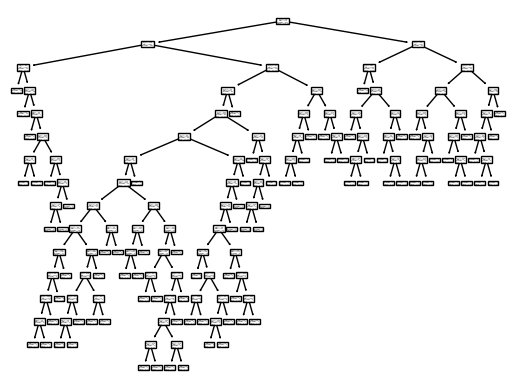

In [33]:
from sklearn import tree
tree.plot_tree(model)


## Model 3: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = {
   "n_estimators": np.arange(start=10, stop=100, step=2),
   "max_depth": np.arange(start=2, stop=20),
   "min_samples_leaf": np.arange(start=1, stop=5),
   "class_weight": [{0: 0.1, 1: 0.9}, {0: 0.2, 1: 0.8}, {0: 0.3, 1: 0.7}],
}

# Using GridSearchCV once again to try and get the best metrics
gscv = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring="recall")
gscv.fit(X_train, y_train)
gscv.best_params_

In [35]:
model = gscv.best_estimator_

print(f"Performance on random forest TEST\n*******************\n{classification_report(y_test, model.predict(X_test))}")
print(f"Performance on random forest TRAIN\n********************\n{classification_report(y_train, model.predict(X_train))}")

Performance on random forest TEST
*******************
              precision    recall  f1-score   support

       False       0.92      0.18      0.30        61
        True       0.32      0.96      0.48        25

    accuracy                           0.41        86
   macro avg       0.62      0.57      0.39        86
weighted avg       0.74      0.41      0.35        86

Performance on random forest TRAIN
********************
              precision    recall  f1-score   support

       False       1.00      0.15      0.26       140
        True       0.34      1.00      0.50        60

    accuracy                           0.41       200
   macro avg       0.67      0.57      0.38       200
weighted avg       0.80      0.41      0.33       200

